In [1]:
# check the current python version, make sure this is the one that with HDDM correctly installed
import sys
sys.executable

'C:\\Users\\kalai\\Anaconda2\\python.exe'

In [2]:
%matplotlib inline
# Preparation
import os, hddm, time, csv
import datetime

# import the toolbox
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

# set the color of plots
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmykw')

C:\Users\kalai\Anaconda2\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [3]:
# load data from cateogriztion based on moral valence
dat_M_match = hddm.load_csv('hddm_tri2.csv')

dat_M_match.head(100)  

,subj_idx,id,match,stim,response,rt,group
0,61,Other,mismatch,0,0,0.343,Group1
1,61,Self,match,1,1,0.363,Group1
2,61,Self,match,1,1,0.364,Group1
3,61,Other,mismatch,0,0,0.377,Group1
4,61,Self,match,1,1,0.378,Group1
5,61,Other,match,1,1,0.392,Group1
6,61,Friend,mismatch,0,0,0.400,Group1
7,61,Friend,match,1,1,0.403,Group1
8,61,Self,mismatch,0,0,0.407,Group1
9,61,Friend,mismatch,0,0,0.410,Group1


In [4]:
nsample = 10000     # number of sampling
nburn   = 1000      # number of burn

# dateToday = str(date.today())  # replace the code below if you prefer using the actual date
dateToday = 'final' # using final in the saved file name

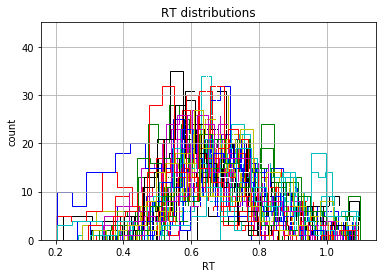

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in dat_M_match.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
plt.savefig('tri_distribution.pdf')

#### Model 1

In [5]:
start_time = time.time()  # the start time of the processing
 
import warnings           # suppress the warnings
warnings.simplefilter('ignore')

dbname = "M_match_m1_" 
M_match_m1 = hddm.HDDMStimCoding(dat_M_match, 
                                    include=('z'), 
                                    stim_col='stim', 
                                    depends_on={'v':['match','id','group'],'t':['match','id','group'],'z':['match','id','group']},
                                    split_param='v', 
                                    drift_criterion=False,
                                    p_outlier=0.05)
                            

M_match_m1.find_starting_values()
M_match_m1.sample(nsample, burn=nburn, dbname=dbname+ '.db', db='pickle')
   
# save the model
M_match_m1.save(dbname)
print("M_match_m1_tri DIC: %f" %M_match_m1.dic) # -4145

 [-----------------100%-----------------] 10001 of 10000 complete in 22933.0 secM_match_m1_tri DIC: -4468.510002


In [7]:
ppc_data_match_m1 = hddm.utils.post_pred_gen(M_match_m1)
ppc_compare_match_m1 = hddm.utils.post_pred_stats(dat_M_match, ppc_data_match_m1)  # MSE 
ppc_compare_match_m1.to_csv('ppc_compare_match_m1_tri.csv', sep = ',')

 [-----------------100%-----------------] 471 of 468 complete in 5639.6 sec

In [6]:
subj_data=M_match_m1.get_subj_nodes()
subj_data.to_csv('tri_node.csv')

#### Get results, plot the posteriors, and compare the posteriors.

P_(friendequal >selfplus)= 0.881
P_(friendequal >strangerminus)= 0.014222222222222223
P_(friendequal <selfplus)= 0.3811111111111111
P_(friendequal >strangerminus)= 0.4478888888888889


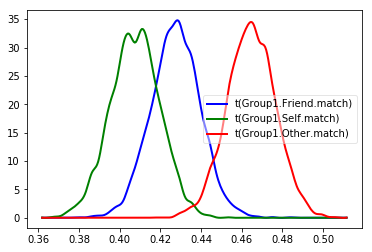

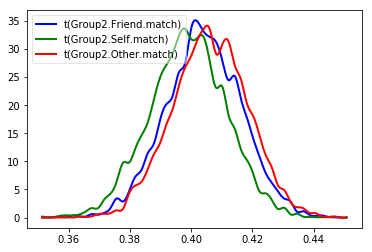

In [9]:
## non-decision time
friendequal,selfplus,strangerminus=M_match_m1.nodes_db.node[['t(Group1.Friend.match)','t(Group1.Self.match)','t(Group1.Other.match)']]
hddm.analyze.plot_posterior_nodes([friendequal,selfplus,strangerminus])
print "P_(friendequal >selfplus)=",(friendequal.trace() >selfplus.trace()).mean()
print "P_(friendequal >strangerminus)=",(friendequal.trace()> strangerminus.trace()).mean()
friendequal,selfplus,strangerminus=M_match_m1.nodes_db.node[['t(Group2.Friend.match)','t(Group2.Self.match)','t(Group2.Other.match)']]
hddm.analyze.plot_posterior_nodes([friendequal,selfplus,strangerminus])
print "P_(friendequal <selfplus)=",(friendequal.trace()< selfplus.trace()).mean()
print "P_(friendequal >strangerminus)=",(friendequal.trace()> strangerminus.trace()).mean()

P_(friendequal >selfplus)= 0.5408888888888889
P_(friendequal >strangerminus)= 0.9314444444444444
P_(friendequal <selfplus)= 0.2991111111111111
P_(friendequal >strangerminus)= 0.18733333333333332


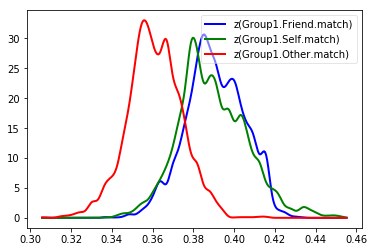

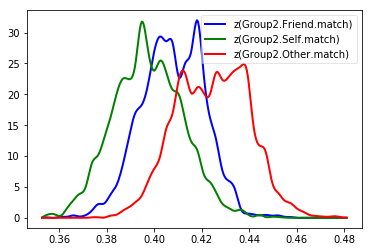

In [10]:
## starting point

friendequal,selfplus,strangerminus=M_match_m1.nodes_db.node[['z(Group1.Friend.match)','z(Group1.Self.match)','z(Group1.Other.match)']]
hddm.analyze.plot_posterior_nodes([friendequal,selfplus,strangerminus])
print "P_(friendequal >selfplus)=",(friendequal.trace() >selfplus.trace()).mean()
print "P_(friendequal >strangerminus)=",(friendequal.trace()> strangerminus.trace()).mean()
friendequal,selfplus,strangerminus=M_match_m1.nodes_db.node[['z(Group2.Friend.match)','z(Group2.Self.match)','z(Group2.Other.match)']]
hddm.analyze.plot_posterior_nodes([friendequal,selfplus,strangerminus])
print "P_(friendequal <selfplus)=",(friendequal.trace()< selfplus.trace()).mean()
print "P_(friendequal >strangerminus)=",(friendequal.trace()> strangerminus.trace()).mean()

P_(friendequal <selfplus)= 0.9827777777777778
P_(friendequal >strangerminus)= 0.9816666666666667
P_(friendequal <selfplus)= 0.3158888888888889
P_(friendequal >strangerminus)= 0.9748888888888889


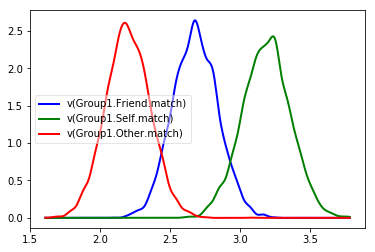

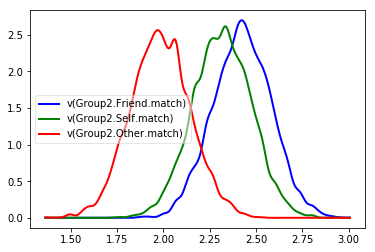

In [11]:
## drift rate
friendequal,selfplus,strangerminus=M_match_m1.nodes_db.node[['v(Group1.Friend.match)','v(Group1.Self.match)','v(Group1.Other.match)']]
hddm.analyze.plot_posterior_nodes([friendequal,selfplus,strangerminus])
print "P_(friendequal <selfplus)=",(friendequal.trace()< selfplus.trace()).mean()
print "P_(friendequal >strangerminus)=",(friendequal.trace()> strangerminus.trace()).mean()
friendequal,selfplus,strangerminus=M_match_m1.nodes_db.node[['v(Group2.Friend.match)','v(Group2.Self.match)','v(Group2.Other.match)']]
hddm.analyze.plot_posterior_nodes([friendequal,selfplus,strangerminus])
print "P_(friendequal <selfplus)=",(friendequal.trace()< selfplus.trace()).mean()
print "P_(friendequal >strangerminus)=",(friendequal.trace()> strangerminus.trace()).mean()

#### Check the convergence of MCMC

In [ ]:

# doing Gelman-Rubin statistic (time consuming)
models_match = []
for i in range(5):
    print('processing Model ', i, '\n')
    m_stim = hddm.HDDMStimCoding(dat_M_match,
                                 include=('z'), 
                                 stim_col='stim',
                                 depends_on={'v':['match','id','group'],'t':['match','id','group'],'z':['match','id','group']},
                                 split_param='v',
                                 drift_criterion=False)
    m_stim.find_starting_values()
    m_stim.sample(nsample, burn = nburn)
    models_match.append(m_stim)

Match_R_hat_vtz3 = hddm.analyze.gelman_rubin(models_match)

# save Categ_R_hat_vtz
with open('Match_R_hat_vtz3_stim.csv','w') as f:
    w = csv.writer(f)
    w.writerows(Match_R_hat_vtz3.items())
    

('processing Model ', 0, '\n')
 [----             12%                  ] 1228 of 10000 complete in 3067.7 sec